<img src="EMODnet_compact_colour (1).png" align="right" width="50%"></img>
# EMODnet OGC services Workshop
### Tier 2: How to use OGC webservices offered by EMODnet in your data analysis

### 2. Visualize data using OGC Web Mapping Service (WMS)

The OWSLib library is a python library that makes accessing data and metadata through OGC services possible. The library abstracts all of the traditional HTTP API calls into programmatic function calls. We will be using this library throughout the tutorial to interact with the EMODnet OGC services.

The library is available from GitHub @  https://github.com/geopython/OWSLib

In [14]:
from owslib.wms import WebMapService

## Working with EMODNet Chemistry data
#### Create a WebMapService object

@Chem has a link to the metadata separate from getcap.
owslib.parseMetadata

In [15]:
# Connecting to the EMODnet Chemistry WMS service
wms = WebMapService('https://ec.oceanbrowser.net/emodnet/Python/web/wms?', version='1.3.0')

#### Find out what a WMS has to offer. Service metadata:

In [16]:
print(wms.identification.type)
print(wms.identification.version)
print(wms.identification.title)
print(wms.identification.abstract)

WMS
1.3.0
EMODNET Chemistry - Eutrophication by Sea Region
EMODnet (Chemical data) Map Server with ocean climatologies.


#### Find out what layers are available

In [17]:
list(wms.contents)

['All_European_Seas/Water_body_ammonium.nc*Water_body_ammonium_L2',
 'point:All_European_Seas/Water_body_ammonium.nc*obsid',
 'All_European_Seas/Water_body_ammonium.nc*Water_body_ammonium',
 'All_European_Seas/Water_body_ammonium.nc*Water_body_ammonium_L1',
 'All_European_Seas/Water_body_ammonium.nc*Water_body_ammonium_deepest',
 'All_European_Seas/Water_body_ammonium.nc*Water_body_ammonium_deepest_L1',
 'All_European_Seas/Water_body_ammonium.nc*Water_body_ammonium_deepest_L2',
 'All_European_Seas/Water_body_ammonium.nc*Water_body_ammonium_deepest_depth',
 'All_European_Seas/Water_body_ammonium.nc*Water_body_ammonium_relerr',
 'All_European_Seas/Water_body_chlorophyll-a.nc*Water_body_chlorophyll-a_L2',
 'point:All_European_Seas/Water_body_chlorophyll-a.nc*obsid',
 'All_European_Seas/Water_body_chlorophyll-a.nc*Water_body_chlorophyll-a',
 'All_European_Seas/Water_body_chlorophyll-a.nc*Water_body_chlorophyll-a_L1',
 'All_European_Seas/Water_body_chlorophyll-a.nc*Water_body_chlorophyll-a_

#### Define the desired Layer for further Inspection

In [18]:
layer = 'All_European_Seas/Water_body_chlorophyll-a.nc*Water_body_chlorophyll-a'

#### Get the details of a layer (available layer metadata):

In [19]:
print(wms[layer].title)
print(wms[layer].keywords)

Water body chlorophyll-a
[]


#### Get bounding boxes information in WGS84
Save as variable 'bbox1 & 2' and print to inspect

In [20]:
#Print the Bounding boxes of the desired layers
bbox1 = wms[layer].boundingBoxWGS84
print(bbox1)

(-45.0, 24.0, 70.0, 83.0)


#### Get available styles

In [21]:
wms[layer].styles

{'pcolor_flat': {'title': 'Flat shading',
  'legend': 'http://ec.oceanbrowser.net/emodnet/Python/web/wms?request=GetLegendGraphic;service=WMS;version=1.3.0;width=100;height=300;format=image/png;layer=All_European_Seas/Water_body_chlorophyll-a.nc%2AWater_body_chlorophyll-a;style=pcolor_flat;label=mg/m3',
  'legend_width': '100',
  'legend_height': '300',
  'legend_format': 'image/png'},
 'contourf': {'title': 'Filled contours',
  'legend': 'http://ec.oceanbrowser.net/emodnet/Python/web/wms?request=GetLegendGraphic;service=WMS;version=1.3.0;width=100;height=300;format=image/png;layer=All_European_Seas/Water_body_chlorophyll-a.nc%2AWater_body_chlorophyll-a;style=contourf;label=mg/m3',
  'legend_width': '100',
  'legend_height': '300',
  'legend_format': 'image/png'},
 'contour': {'title': 'Contours',
  'legend': 'http://ec.oceanbrowser.net/emodnet/Python/web/wms?request=GetLegendGraphic;service=WMS;version=1.3.0;width=100;height=300;format=image/png;layer=All_European_Seas/Water_body_chlo

#### See available methods

In [22]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

#### Get available formats

In [23]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'image/svg+xml',
 'image/eps',
 'application/pdf',
 'application/vnd.google-earth.kmz',
 'video/webm',
 'video/mp4']

#### Get a map image and plot with matplotlib
Matplotlib allows for simple plotting of the dataset although, the library is not tailored specifically to plot geospatial. It is more commonly used for taking an initial glance at the data or in combination with other libraries such as Cartopy (see next step). 

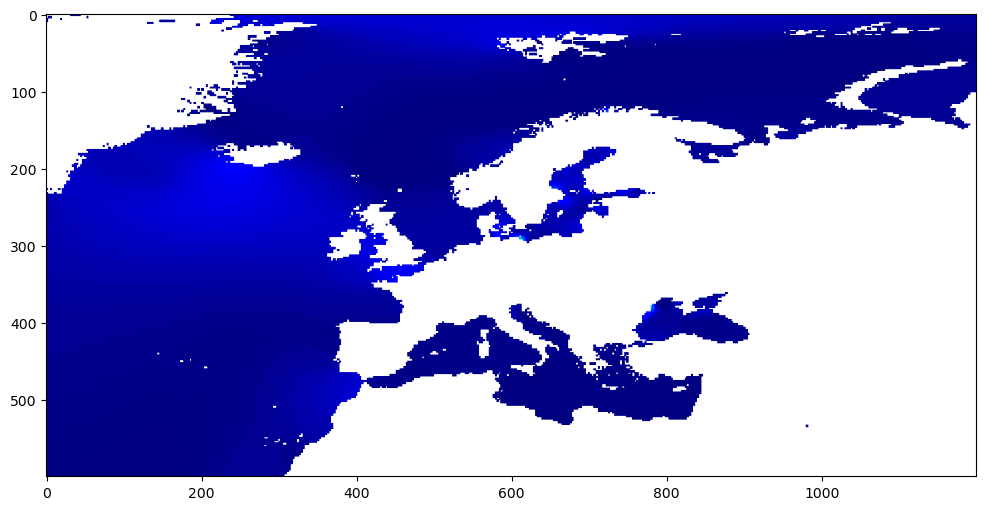

(-45.0, 24.0, 70.0, 83.0)


In [24]:
#Import necessary libraries for plotting
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
save_path = 'data/'
#Define the getMap function to retrieve the layer images from WMS
def getMap(filename, bbox, layerName):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers= layerName,
                 size=(1200,600), 
                 srs='EPSG:4326',
                 bbox=bbox1,
                 format='image/png',
                 style='contour',
                 label='mg/m³',
                 transparent=True)
    
    # Write the image to a temporary file
    out = open(os.path.join(save_path, filename), 'wb')
    out.write(img.read())
    out.close()  

# Define the layers to be used for the image, 
# here we use the multicolor bathymery dataset.
getMap(
    layerName=[layer],
    bbox=(bbox1),
    filename = 'chlorophyll-a.png'
)
#read the image
image=mpimg.imread('data/chlorophyll-a.png')

# plot the image for visualisation
fig1 = plt.figure(figsize=(12, 6))
plt.imshow(image,aspect='auto')
plt.show()
print(bbox1)

As you can see, the presentation of this dataset does not make much sense as such. To present it correctly we need to set the correct projection and define an area of interest.

#### Use the WMS service directly in Cartopy
We can now use cartopy to plot the a defined area of interest in the right CRS projection and with the adequate legend.

http://ec.oceanbrowser.net/emodnet/Python/web/wms?request=GetLegendGraphic;service=WMS;version=1.3.0;width=100;height=300;format=image/png;layer=All_European_Seas/Water_body_chlorophyll-a.nc%2AWater_body_chlorophyll-a;style=contourf;label=mg/m3
Image saved as data/legend_image.png


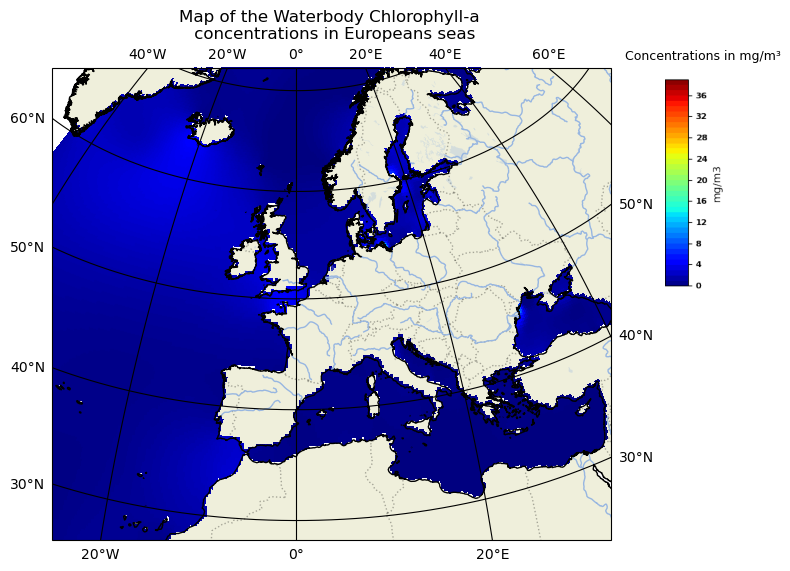

In [25]:
#Import necessary libraries, Cartopy allows for more complex geospatial data rendering, see Cartopy.url for more info
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import requests

#Creating figure and setting the projection
fig = plt.figure(figsize=(15, 6))                                                                        # Increase the figure size
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1])                                                         # Use gridspec to adjust subplot sizes
ax1 = fig.add_subplot(1,1,1, projection=ccrs.Orthographic(central_longitude=0, central_latitude=40)) # Set custom projection

#Adding features to the map using cartopy
#ax1.add_feature(cartopy.feature.OCEAN, )
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=0.3)
ax1.add_feature(cartopy.feature.LAKES, alpha=0.3)
ax1.add_feature(cartopy.feature.RIVERS) 
ax1.coastlines(resolution='10m')
ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
ax1.set_title('Map of the Waterbody Chlorophyll-a \n concentrations in Europeans seas')

#Setting up map extent to match the extent of European Seas
ax1.set_extent([-25,33,25,70])

# access WMS requesting map images in custom projection
ax1.add_wms(wms=wms.url,
           layers= layer) 

###Now set up the legend for the dataset, retrieving it from the wms.styles used above
# Define the legend URL
print(wms[layer].styles['contourf']['legend'])
legend_url = wms[layer].styles['contourf']['legend']

# Define the directory path where you want to save the images
save_path = "data/"

# Download and save 
response = requests.get(legend_url)
# Check if the request was successful (status code 200)
if response.status_code == 200:
    filename = f"legend_image.png"                             # Customize the filename
    with open(save_path + filename, 'wb') as file:
            file.write(response.content)
    print(f"Image saved as {save_path + filename}")
else:
    print(f"Failed to retrieve Image (Status Code: {response.status_code})")
        
# Define the paths to the saved legend image
legend_image_paths = ["data/legend_image.png"]

# Define the titles for the plot and legend
legend_title = "Concentrations in mg/m³"
legend1_img = plt.imread(legend_image_paths[0])

# Create a subplot for the legend to the right (subplot 2)
ax2 = fig.add_subplot(gs[0,1], frame_on=False)
ax2.imshow(legend1_img)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title(legend_title, fontsize = 9)

# Save the map image
plt.tight_layout()
plt.savefig(save_path + "Chlorophyll-a_map", dpi=300)
plt.show()


### [>> Next: Subset and download data using OGC Web Feature and Coverage Services (WFS/WCS)](Tutorial_Part_3_WFS_WCS.ipynb) 